In [6]:
import os
import glob
import random

import torch
from torch.utils.data import DataLoader, ConcatDataset
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

pont_path =  'C:\\WINDOWS\\Fonts\\HANDotumB.ttf'
fontprop = fm.FontProperties(fname=pont_path, size=18)

from PIL import Image

In [5]:
base_dir = os.path.join('C:\\Users\\gjust\\Documents\\Github', 'data', 'rock_scissor_paper2')
classes = ['rock', 'scissor', 'paper']
team_list = ['사공', '수완', '호성', '경은', '승민', \
             '재성', '지윤', '은서', '정식']

print('Name (rock, scissor, paper)')
print('*'*30)
for name in team_list:
    len_rock = len(glob.glob(os.path.join(base_dir, name, 'rock/*.jpg')))
    len_scissor = len(glob.glob(os.path.join(base_dir, name, 'scissor/*.jpg')))
    len_paper = len(glob.glob(os.path.join(base_dir, name, 'paper/*.jpg')))
        
    print(name, (len_rock, len_scissor, len_paper))

NameError: name 'os' is not defined

In [6]:
def get_image_sample(name, cls, sample=3):
    image_dir = os.path.join(base_dir, name, cls)
    image_list = glob.glob(image_dir + '/*.jpg')
    
    samples = random.sample(image_list, sample)
    
    return samples

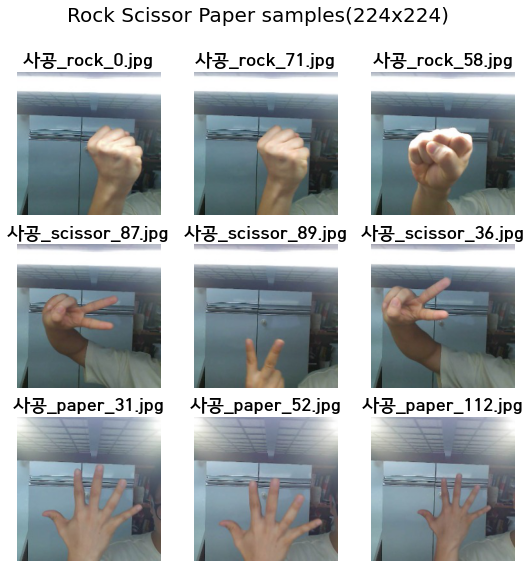

In [7]:
rock_samples = get_image_sample('사공', 'rock')
scissor_samples = get_image_sample('사공', 'scissor')
paper_samples = get_image_sample('사공', 'paper')

sample_list = rock_samples + scissor_samples + paper_samples

plt.figure(figsize=(9,9))
plt.suptitle('Rock Scissor Paper samples(224x224)', fontsize=20)
for i, image_path in enumerate(sample_list):
    image = Image.open(image_path)
    filename = image_path.split('\\')[-1]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(filename, fontproperties=fontprop)
    plt.axis('off')

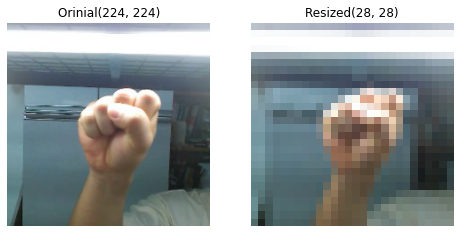

In [8]:
def resize_image(old_image, target_size=(28,28)):
    target_size = target_size
    new_image = old_image.resize(target_size, Image.ANTIALIAS)
    
    return new_image

sample_path = get_image_sample('사공', 'rock', sample=1)[0]
sample_image = Image.open(sample_path)
sample_resized = resize_image(sample_image)

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.imshow(sample_image)
plt.title(f'Orinial{sample_image.size}')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sample_resized)
plt.title(f'Resized{sample_resized.size}')
plt.axis('off')

plt.show()

In [9]:
train_dir = os.path.join(base_dir, '사공')
test_dir = os.path.join(base_dir, '수완')

print(f'Train directory : {train_dir}')
print(f'Test directory : {test_dir}')

Train directory : C:\Users\gjust\Documents\Github\data\rock_scissor_paper2\사공
Test directory : C:\Users\gjust\Documents\Github\data\rock_scissor_paper2\수완


In [10]:
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])])

trainset = ImageFolder(root=train_dir, transform=transform)
testset = ImageFolder(root=test_dir, transform=transform)

In [11]:
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)
testloader = DataLoader(testset, batch_size=1)

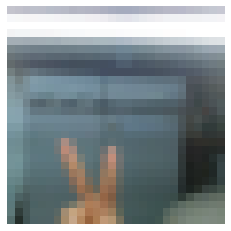

In [12]:
def img_show(dataloader, inv_norm=True):
    images, labels = iter(dataloader).next()

    if inv_norm:
        inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                                             std=[1/0.229, 1/0.224, 1/0.225])
        images = inv_normalize(images)

    grid = torchvision.utils.make_grid(images, padding=1)
    grid = grid.permute(1,2,0)
    
    plt.axis('off')
    plt.imshow(grid)

img_show(trainloader, inv_norm=True)

In [85]:
# Make Model

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.conv3 = nn.Conv2d(20, 20, 5)
        self.conv4 = nn.Conv2d(20, 10, 5)
        self.conv5 = nn.Conv2d(10, 10, 5)
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(10 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 3)
        
    def forward(self, x): # 28 28
        x = F.relu(self.conv1(x)) # 24 24
        x = F.relu(self.conv2(x)) # 20 20
        x = F.relu(self.conv3(x)) # 16 16
        x = F.relu(self.conv4(x)) # 12 12
        x = F.relu(self.conv5(x)) # 8 8
        x = self.pool(x)          # 4 4
        x = x.view(-1, 4 * 4 * 10)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x   
    
model = Net()

In [86]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


In [87]:
import torch.optim as optim

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 30, gamma = 0.1)
print(loss_func, optimizer)

CrossEntropyLoss() SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.01
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [88]:
model.eval()
model.to(device)

with torch.no_grad():
    images, labels = next(iter(trainloader))
    images, labels = images.to(device), labels.to(device)
    
    example = model(images)
    
    print(example.size())
    print('Test : ', example)

torch.Size([1, 3])
Test :  tensor([[-0.0411, -0.0953,  0.0265]], device='cuda:0')


In [89]:
import time

# Train
EPOCH = 10
model.train()
for e in range(1, EPOCH+1):
    start_time = time.time()
    running_loss = 0
    
        
    for i, data in enumerate(trainloader):
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss
        now = time.time()

        print('\r[%d/%d]-----[%d/%d] LOSS : %.3f------ Time : %d ' 
              %(e, EPOCH, i+1, len(trainloader), running_loss, now - start_time), end = '')        
    print('\n')

[1/10]-----[350/350] LOSS : 386.075------ Time : 1 

[2/10]-----[350/350] LOSS : 385.118------ Time : 1 

[3/10]-----[350/350] LOSS : 385.677------ Time : 1 

[4/10]-----[350/350] LOSS : 385.537------ Time : 1 

[5/10]-----[350/350] LOSS : 384.194------ Time : 1 

[6/10]-----[350/350] LOSS : 385.635------ Time : 1 

[7/10]-----[350/350] LOSS : 384.468------ Time : 1 

[8/10]-----[350/350] LOSS : 333.735------ Time : 1 

[9/10]-----[350/350] LOSS : 263.965------ Time : 1 

[10/10]-----[350/350] LOSS : 257.167------ Time : 1 



In [91]:
model.eval()
correct = 0
with torch.no_grad():
    for i, data in enumerate(testloader):
        val_images, val_labels = data
        
        val_images, val_labels = val_images.to(device), val_labels.to(device)
        val_outputs = model(val_images)
        pred = val_outputs.argmax(dim=1, keepdim=True)
        correct += pred.eq(val_labels.view_as(pred)).sum().item()
        
print('Accuracy of the network on 10000 test images : %.3f %%' %(100 * correct / len(testloader.dataset)))               

Accuracy of the network on 10000 test images : 48.197 %


# 모두 합친 것

In [13]:
*train_list, test_list = team_list
print(train_list)
print(test_list)

['사공', '수완', '호성', '경은', '승민', '재성', '지윤', '은서']
정식


In [14]:
transform = transforms.Compose([
    #transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])])

trainset_list = []
for train_name in train_list:
    train_dir = os.path.join(base_dir, train_name)
    trainset = ImageFolder(root=train_dir, transform=transform)
    trainset_list.append(trainset)
test_dir = os.path.join(base_dir, '정식')

trainset = ConcatDataset(trainset_list)
testset = ImageFolder(root=test_dir, transform=transform)


print(len(trainset))
print(len(testset))

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=4)

2462
324


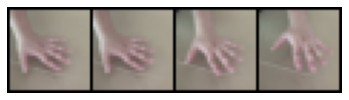

In [7]:
def img_show(dataloader, inv_norm=True):
    images, labels = iter(dataloader).next()

    if inv_norm:
        inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                                             std=[1/0.229, 1/0.224, 1/0.225])
        images = inv_normalize(images)

    grid = torchvision.utils.make_grid(images, padding=1)
    grid = grid.permute(1,2,0)
    
    plt.axis('off')
    plt.imshow(grid)

img_show(testloader, inv_norm=True)

In [19]:
# Make Model

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(3 * 3 * 8, 128)
        self.fc3 = nn.Linear(64, 3)
        
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x): # 28 28
        x = F.relu(self.conv1(x)) # 26 26
        x = self.pool(x)          # 13 13
        x = F.relu(self.conv2(x)) # 11 11
        x = self.pool(x)          # 5 5
        x = F.relu(self.conv3(x)) # 3 3
        
        x = x.view(-1, 3 * 3 * 8)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x   
    
model = Net()

In [16]:
import torch.nn as nn
from torchvision import models
vgg = models.vgg16(pretrained=True)

# 모델 고정하기(학습x)
for p in vgg.features.parameters():
    p.requires_grad = False
    
# 출력층 수정하기
vgg.classifier[6] = nn.Linear(in_features=4096, out_features=3, bias=True)

In [19]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


In [20]:
import torch.optim as optim

model = vgg
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, weight_decay=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 30, gamma = 0.1)
print(loss_func, optimizer)

CrossEntropyLoss() SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.01
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0.1
)


In [21]:
model.eval()
model.to(device)

with torch.no_grad():
    images, labels = next(iter(trainloader))
    images, labels = images.to(device), labels.to(device)
    
    example = model(images)
    
    print(example.size())
    print('Test : ', example[:5])

torch.Size([32, 3])
Test :  tensor([[ 0.0726, -0.0338,  0.2339],
        [-0.2509, -0.0355,  0.2371],
        [ 0.0925,  0.0868,  0.0208],
        [ 0.2825,  0.0953, -0.1022],
        [ 0.2544, -0.0339,  0.0864]], device='cuda:0')


In [2]:
import time

# Train
def train(EPOCH, model, dataloader, device, loss_func, optimizer):
    print('--------Start Train----------')
    EPOCH = EPOCH
    model.to(device)
    model.train()
    train_loss_list = []
    for e in range(1, EPOCH+1):
        start_time = time.time()
        running_loss = 0

        for i, data in enumerate(dataloader):
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss
            now = time.time()

            print('\r[%d/%d]-----[%d/%d] LOSS : %.3f------ Time : %d ' 
                  %(e, EPOCH, i+1, len(dataloader), running_loss, now - start_time), end = '')        
        train_loss_list.append(running_loss)
        print('\n')
    print('--------Finsh Train----------')
    return train_loss_list

In [17]:
def test(model, dataloader, device, loss_func, confusion_shape=(3,3)):
    print('--------Start Test----------')
    model.eval()
    model.to(device)
    correct = 0
    confusion_matrix = np.zeros(confusion_shape)
    test_loss_list = []
    with torch.no_grad():
        for i, data in enumerate(dataloader):
            val_images, val_labels = data
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            loss = loss_func(val_outputs, val_labels)
            pred = val_outputs.argmax(dim=1, keepdim=True)
            for i, j in zip(val_labels, pred):
                confusion_matrix[i][j] += 1
            correct += pred.eq(val_labels.view_as(pred)).sum().item()
            test_loss_list.append(loss)
    acc = (100 * correct / len(dataloader.dataset))
    print('Accuracy of the network on 10000 test images : %.3f %%' %(acc))               
    print(confusion_matrix)
    print('--------Finsh Test----------')
    return acc, test_loss_list, confusion_matrix

In [26]:
# Weight 초기화
def weight_init(m):
    if ((type(m) == nn.Conv2d) or (type(m) == nn.Linear)):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)
        
model.apply(weight_init)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=72, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [16]:
import torch.nn as nn
from torchvision import models
import torch.optim as optim

np.random.seed(40)
base_dir = os.path.join('C:\\Users\\gjust\\Documents\\Github', 'data', 'rock_scissor_paper2')
classes = ['rock', 'scissor', 'paper']
team_list = ['사공', '수완', '호성', '경은', '승민', \
             '재성', '지윤', '은서', '정식']


transform = transforms.Compose([
    transforms.Resize(112),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])])
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)


result = {}
best_acc = 0
for i, test_list in enumerate(team_list, start=1):
    model = models.vgg16(pretrained=True)
    for p in model.features.parameters():
        p.requires_grad = False
    model.classifier[6] = nn.Linear(in_features=4096, out_features=3, bias=True)
    
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 0.01, weight_decay=0.1)
    
#     result['try{}'.format(i)] = {}
    print(f'------------------------------try{i}--------------------------------')
    train_list = list(set(team_list) - set([test_list]))
    trainset_list = []
    for train_name in train_list:
        train_dir = os.path.join(base_dir, train_name)
        trainset = ImageFolder(root=train_dir, transform=transform)
        trainset_list.append(trainset)
    test_dir = os.path.join(base_dir, test_list)
#     result['try{}'.format(i)]['train_list'] = train_list
#     result['try{}'.format(i)]['test_list'] = test_list
    
    trainset = ConcatDataset(trainset_list)
    testset = ImageFolder(root=test_dir, transform=transform)


    print(len(trainset))
    print(len(testset))

    trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
    testloader = DataLoader(testset, batch_size=4)
    
    train_loss_list = train(10, model, trainloader, device, loss_func, optimizer)
    accuracy, test_loss_list, confusion_matrix = test(model, testloader, device, loss_func)
    
#     result['try{}'.format(i)]['train_loss_list'] = train_loss_list.
#     result['try{}'.format(i)]['accuracy'] = accuracy
#     result['try{}'.format(i)]['test_loss_list'] = test_loss_list
#     result['try{}'.format(i)]['confusion_matrix'] = confusion_matrix
    
    if best_acc < accuracy:
        result['model_state_dict'] = model.state_dict()
        best_acc = accuracy

cuda
------------------------------try1--------------------------------
2436
350
--------Start Train----------
[1/10]-----[77/77] LOSS : 20.624------ Time : 6 

[2/10]-----[77/77] LOSS : 5.664------ Time : 6 

[3/10]-----[77/77] LOSS : 3.232------ Time : 7 

[4/10]-----[77/77] LOSS : 2.337------ Time : 7 

[5/10]-----[77/77] LOSS : 2.026------ Time : 7 

[6/10]-----[77/77] LOSS : 2.093------ Time : 6 

[7/10]-----[77/77] LOSS : 1.811------ Time : 6 

[8/10]-----[77/77] LOSS : 1.882------ Time : 6 

[9/10]-----[77/77] LOSS : 1.863------ Time : 6 

[10/10]-----[77/77] LOSS : 1.709------ Time : 6 

--------Finsh Train----------
--------Start Test----------
Accuracy of the network on 10000 test images : 76.857 %
[[ 50.   3.  64.]
 [  1. 121.   0.]
 [  4.   9.  98.]]
--------Finsh Test----------
------------------------------try2--------------------------------
2481
305
--------Start Train----------
[1/10]-----[78/78] LOSS : 22.738------ Time : 6 

[2/10]-----[78/78] LOSS : 6.127------ Time

In [19]:
torch.save(result['model_state_dict'], 'rock_scissor_paper_best_vgg.pt')

In [15]:
for i in range(10):
    if a.get('aa') is None:
        print(i)
    else:
        

0
1
2
3
4
5
6
7
8
9


In [14]:
a = {}
a.get('aa')

In [ ]:
trainset_list = []
for train_name in train_list:
    train_dir = os.path.join(base_dir, train_name)
    trainset = ImageFolder(root=train_dir, transform=transform)
    trainset_list.append(trainset)
test_dir = os.path.join(base_dir, '정식')

trainset = ConcatDataset(trainset_list)
testset = ImageFolder(root=test_dir, transform=transform)


print(len(trainset))
print(len(testset))

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=4)

In [330]:
train_loss_list = train(10, model, trainloader, device, loss_func, optimizer)
test_loss_list = test(model, testloader, device, loss_func)

--------Start Train----------
[1/10]-----[77/77] LOSS : 84.630------ Time : 2 

[2/10]-----[77/77] LOSS : 84.653------ Time : 2 

[3/10]-----[77/77] LOSS : 84.645------ Time : 2 

[4/10]-----[77/77] LOSS : 84.631------ Time : 2 

[5/10]-----[77/77] LOSS : 84.631------ Time : 2 

[6/10]-----[77/77] LOSS : 84.647------ Time : 2 

[7/10]-----[77/77] LOSS : 84.634------ Time : 2 

[8/10]-----[77/77] LOSS : 84.639------ Time : 2 

[9/10]-----[77/77] LOSS : 84.633------ Time : 2 

[10/10]-----[77/77] LOSS : 84.699------ Time : 2 

--------Finsh Train----------
--------Start Test----------
Accuracy of the network on 10000 test images : 32.407 %
[[105.   0.   0.]
 [106.   0.   0.]
 [113.   0.   0.]]
--------Finsh Test----------


In [244]:
import pandas as pd
pd.DataFrame(confusion_matrix,
             columns=trainset.datasets[0].class_to_idx.keys(),
             index=trainset.datasets[0].class_to_idx.keys())

,paper,rock,scissor
paper,94.0,11.0,0.0
rock,81.0,25.0,0.0
scissor,113.0,0.0,0.0


In [6]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 최종
- ['사공', '수완', '호성','승민','재성', '지윤', '은서', '정식'] 학습
- ['경은'] validation 97%
- vgg16모델, weight 저장함
- ['민지', '범진', '보경', '영민', '은영', '재준', '효정'] 테스트
- 82%

In [ ]:
['사공', '수완', '호성', '경은', '승민','재성', '지윤', '은서', '정식']

In [2]:
import torch.nn as nn
from torchvision import models
import torch.optim as optim

import os
import glob
import random

import torch
from torch.utils.data import DataLoader, ConcatDataset
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

pont_path =  'C:\\WINDOWS\\Fonts\\HANDotumB.ttf'
fontprop = fm.FontProperties(fname=pont_path, size=18)

from PIL import Image

np.random.seed(40)

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

model = models.vgg16(pretrained=True)
for p in model.features.parameters():
    p.requires_grad = False
model.classifier[6] = nn.Linear(in_features=4096, out_features=3, bias=True)

model.load_state_dict(torch.load('rock_scissor_paper_best_vgg.pt'))

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, weight_decay=0.1)

cuda


In [3]:
import time

# Train
def train(EPOCH, model, dataloader, device, loss_func, optimizer):
    print('--------Start Train----------')
    EPOCH = EPOCH
    model.to(device)
    model.train()
    train_loss_list = []
    for e in range(1, EPOCH+1):
        start_time = time.time()
        running_loss = 0

        for i, data in enumerate(dataloader):
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss
            now = time.time()

            print('\r[%d/%d]-----[%d/%d] LOSS : %.3f------ Time : %d ' 
                  %(e, EPOCH, i+1, len(dataloader), running_loss, now - start_time), end = '')        
        train_loss_list.append(running_loss)
        print('\n')
    print('--------Finsh Train----------')
    return train_loss_list

def test(model, dataloader, device, loss_func, confusion_shape=(3,3)):
    print('--------Start Test----------')
    model.eval()
    model.to(device)
    correct = 0
    confusion_matrix = np.zeros(confusion_shape)
    test_loss_list = []
    with torch.no_grad():
        for i, data in enumerate(dataloader):
            val_images, val_labels = data
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            loss = loss_func(val_outputs, val_labels)
            pred = val_outputs.argmax(dim=1, keepdim=True)
            for i, j in zip(val_labels, pred):
                confusion_matrix[i][j] += 1
            correct += pred.eq(val_labels.view_as(pred)).sum().item()
            test_loss_list.append(loss)
    acc = (100 * correct / len(dataloader.dataset))
    print('Accuracy of the network on 10000 test images : %.3f %%' %(acc))               
    print(confusion_matrix)
    print('--------Finsh Test----------')
    return acc, test_loss_list, confusion_matrix

In [4]:
base_dir = os.path.join('C:\\Users\\gjust\\Documents\\Github', 'data', 'rock_scissor_paper2', 'test')
classes = ['rock', 'scissor', 'paper']
test_list = ['민지', '범진', '보경', '영민', '은영', '재준', '효정']


transform = transforms.Compose([
    transforms.Resize(112),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])])


testset_list = []
for test_name in test_list:
    test_dir = os.path.join(base_dir, test_name)
    testset = ImageFolder(root=test_dir, transform=transform)
    testset_list.append(testset)
    
testset = ConcatDataset(testset_list)
testloader = DataLoader(testset, batch_size=8)
print('Number of testdata : ', len(testset))

accuracy, test_loss_list, confusion_matrix = test(model, testloader, device, loss_func)

Number of testdata :  2103
--------Start Test----------
Accuracy of the network on 10000 test images : 82.549 %
[[672.  12.  17.]
 [  8. 652.  41.]
 [246.  43. 412.]]
--------Finsh Test----------
